## Data Exploration

#### Explore the Datasets from 2017-2021


Check if they have the exact same columns

In [18]:
#import pandas
import pandas as pd

# Define the file paths for the datasets
all_files = ["PitCount_2017.csv", "PitCount_2018.csv", "PitCount_2019.csv", "PitCount_2020.csv", "PitCount_2021.csv"]

# Initialize an empty list to store column names for each dataset.
columns_list = []

# Looping through each dataset file
for file in all_files:
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Extracting the column names and appending to the list
    columns_list.append(set(df.columns))

# Checking to see if all datasets have the same columns
if all(x == columns_list[0] for x in columns_list):
    print("All datasets have the exact same columns.")
else:
    print("Datasets have different columns.")

All datasets have the exact same columns.


Each dataset represents a different year. However, they do not have a year column. Adding a year column so that we can merge them into a unified dataset.

In [19]:
# Looping through each dataset file
for file in all_files:
    # Extracting the years from the file name
    year = int(file.split("_")[-1].split(".")[0])
    
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Add a "Year" column with the corresponding year value
    df["Year"] = year
    
    # Saving the modified DataFrame back to the original file
    df.to_csv(file, index=False)

    print(f"Year column added to {file} and saved successfully.")


Year column added to PitCount_2017.csv and saved successfully.
Year column added to PitCount_2018.csv and saved successfully.
Year column added to PitCount_2019.csv and saved successfully.
Year column added to PitCount_2020.csv and saved successfully.
Year column added to PitCount_2021.csv and saved successfully.


#### Unify the 2017-2021 datastets.

In [20]:
# Initialize an empty list to store DataFrames
dfs = []

# Loop through each dataset file
for file in all_files:
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into one
pc17_21 = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
pc17_21.head()

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,"1,128",170,133,825,445,678,4,...,3,9,12,0.0,21,6,15,21,0.0,2017
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717,135,53,529,320,397,0,...,7,3,10,0.0,18,14,4,18,0.0,2017
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,"1,092",104,125,863,334,738,19,...,2,0,2,0.0,10,4,6,10,0.0,2017
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606,116,35,455,222,383,1,...,3,9,12,0.0,18,6,12,18,0.0,2017
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155,0,8,147,72,81,0,...,0,0,0,0.0,0,0,0,0,0.0,2017


##### Explore the newly created dataset pc17_21

In [21]:
# Check the shape of the merged dataset.
pc17_21.shape

(1940, 543)

### Null values.

In [22]:
# Get the count of null values for each column.
null_counts = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values")
for c, null_count in null_counts.items():
    if null_count > 0:
        print(f"{c}: {null_count} null values")

Columns with null values
CoC Number: 10 null values
CoC Name: 10 null values
Count Types: 19 null values
Overall Homeless: 10 null values
Overall Homeless - Under 18: 10 null values
Overall Homeless - Age 18 to 24: 10 null values
Overall Homeless - Over 24: 10 null values
Overall Homeless - Female: 10 null values
Overall Homeless - Male: 10 null values
Overall Homeless - Transgender: 10 null values
Overall Homeless - Gender that is not Singularly Female or Male: 10 null values
Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 10 null values
Overall Homeless - Hispanic/Latin(o)(a)(x): 10 null values
Overall Homeless - White: 10 null values
Overall Homeless - Black, African American, or African: 10 null values
Overall Homeless - Asian or Asian American: 10 null values
Overall Homeless - American Indian, Alaska Native, or Indigenous: 10 null values
Overall Homeless - Native Hawaiian or Other Pacific Islander: 10 null values
Overall Homeless - Multiple Races: 10 null values
Sheltered ES 

#### Presence of null values per row.

In [23]:
def count_rows_with_nulls_above_threshold(data, threshold):
    # Count the number of null values in each row
    null_counts = data.isnull().sum(axis=1)
    # Count the number of rows with null values equal or above the threshold
    rows_above_threshold = (null_counts >= threshold).sum()
    return rows_above_threshold

# Define the thresholds
thresholds = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 520, 530, 541, 543]

# Iterate through the thresholds and count rows with null values above each threshold
for threshold in thresholds:
    rows_above_threshold = count_rows_with_nulls_above_threshold(pc17_21, threshold)
    print(f"Number of rows with more than or equal to {threshold} null values: {rows_above_threshold}")



Number of rows with more than or equal to 2 null values: 76
Number of rows with more than or equal to 5 null values: 64
Number of rows with more than or equal to 10 null values: 55
Number of rows with more than or equal to 20 null values: 52
Number of rows with more than or equal to 30 null values: 49
Number of rows with more than or equal to 40 null values: 49
Number of rows with more than or equal to 50 null values: 47
Number of rows with more than or equal to 60 null values: 45
Number of rows with more than or equal to 70 null values: 40
Number of rows with more than or equal to 80 null values: 40
Number of rows with more than or equal to 90 null values: 38
Number of rows with more than or equal to 100 null values: 10
Number of rows with more than or equal to 150 null values: 10
Number of rows with more than or equal to 200 null values: 10
Number of rows with more than or equal to 300 null values: 10
Number of rows with more than or equal to 400 null values: 10
Number of rows with m

The goal is to keep as much data as possible as each row represents a CoC.

Explore the dynamics of the null values in CoC Name and Overall Homeless columns.

In [24]:
# Condition 1: Both 'CoC Name' and 'Overall Homeless' are NaN
both_nan = pc17_21[pc17_21['CoC Name'].isnull() & pc17_21['Overall Homeless'].isnull()]
num_both_nan = len(both_nan)

# Condition 2: 'CoC Name' is NaN
coc_name_nan = pc17_21[pc17_21['CoC Name'].isnull()]
num_coc_name_nan = len(coc_name_nan)

# Condition 3: 'Overall Homeless' is NaN
overall_homeless_nan = pc17_21[pc17_21['Overall Homeless'].isnull()]
num_overall_homeless_nan = len(overall_homeless_nan)

# Print the number of rows for each condition
print(f"Number of rows with both 'CoC Name' and 'Overall Homeless' as NaN: {num_both_nan}")
print(f"Number of rows with 'CoC Name' as NaN: {num_coc_name_nan}")
print(f"Number of rows with 'Overall Homeless' as NaN: {num_overall_homeless_nan}")

# Print the rows for each condition
print("Rows with both 'CoC Name' and 'Overall Homeless' as NaN:")
print(both_nan)

print("\nRows with 'CoC Name' as NaN:")
print(coc_name_nan)

print("\nRows with 'Overall Homeless' as NaN:")
print(overall_homeless_nan)

Number of rows with both 'CoC Name' and 'Overall Homeless' as NaN: 10
Number of rows with 'CoC Name' as NaN: 10
Number of rows with 'Overall Homeless' as NaN: 10
Rows with both 'CoC Name' and 'Overall Homeless' as NaN:
                                             CoC Number CoC Name Count Types  \
386                                                 NaN      NaN         NaN   
387   a MO-604 covers territory in both Missouri and...      NaN         NaN   
774                                                 NaN      NaN         NaN   
775   a MO-604 covers territory in both Missouri and...      NaN         NaN   
1161                                                NaN      NaN         NaN   
1162  a MO-604 covers territory in both Missouri and...      NaN         NaN   
1549                                                NaN      NaN         NaN   
1550  a MO-604 covers territory in both Missouri and...      NaN         NaN   
1938                                                NaN      

There are the same 10 rows that are missing CoC Name and Overall Homeless, drop these rows.

In [25]:
# Identify rows where both 'CoC Name' and 'Overall Homeless' are NaN
both_nan = pc17_21['CoC Name'].isnull() & pc17_21['Overall Homeless'].isnull()

# Drop these rows from the DataFrame
pc17_21 = pc17_21.drop(pc17_21[both_nan].index)

pc17_21.shape

(1930, 543)

Recheck the null values. Make sure CoC Name and Overall Homeless columns do not have.

In [26]:
# Get the count of null values for each column
null_counts2 = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values:")
for column, null_count in null_counts2.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")

Columns with null values:
CoC Number: 5 null values
Count Types: 9 null values
Unsheltered Homeless - Under 18: 32 null values
Unsheltered Homeless - Age 18 to 24: 35 null values
Unsheltered Homeless - Over 24: 35 null values
Unsheltered Homeless - Female: 34 null values
Unsheltered Homeless - Male: 34 null values
Unsheltered Homeless - Transgender: 35 null values
Unsheltered Homeless - Gender that is not Singularly Female or Male: 34 null values
Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 36 null values
Unsheltered Homeless - Hispanic/Latin(o)(a)(x): 35 null values
Unsheltered Homeless - White: 35 null values
Unsheltered Homeless - Black, African American, or African: 35 null values
Unsheltered Homeless - Asian or Asian American: 35 null values
Unsheltered Homeless - American Indian, Alaska Native, or Indigenous: 35 null values
Unsheltered Homeless - Native Hawaiian or Other Pacific Islander: 35 null values
Unsheltered Homeless - Multiple Races: 34 null values
Unsheltered 

No null values found in the CoC Name and Overall Homeless columns.

#### Dtypes: Dealing with Numeric Values

In [27]:
pc17_21.head()

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,"1,128",170,133,825,445,678,4,...,3,9,12,0.0,21,6,15,21,0.0,2017
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717,135,53,529,320,397,0,...,7,3,10,0.0,18,14,4,18,0.0,2017
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,"1,092",104,125,863,334,738,19,...,2,0,2,0.0,10,4,6,10,0.0,2017
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606,116,35,455,222,383,1,...,3,9,12,0.0,18,6,12,18,0.0,2017
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155,0,8,147,72,81,0,...,0,0,0,0.0,0,0,0,0,0.0,2017


Check to see if columns with numerical values have a different dtype.

In [28]:
null_columns = pc17_21.columns[pc17_21.isnull().any()]

# Filter columns with null values that are numeric type
column_types = pc17_21.dtypes[3:]

# Check if all the data types are either int or float
if all(dtype in [int, float, 'int64', 'float64'] for dtype in column_types):
    print("All columns starting from Overall Homeless column are int or float.")
else:
    print('Dtype other than float of int.')

Dtype other than float of int.


Explore the unique values in these columns.

## !!Correction needed - Print the unique values of all the columns starting from Overall Homeless.

In [ ]:
#Select all the columns starting from "Overall Homeless."
columns_unique = pc17_21.columns[pc17_21.columns.get_loc("Overall Homeless"):]

#Get unique values for each of these columns
unique_values = {c: pc17_21[c].unique() for c in columns_unique}

#Print unique_values
print(unique_values)

We see that there a commas being used to separate the numbers at the thousand level. Going to replace all the commas after the third column.

In [30]:
# Function to remove commas and convert to float
def remove_commas_and_convert_to_float(value):
    if pd.isnull(value):
        return value
    else:
        try:
            return float(value.replace(',', ''))
        except AttributeError:  # Handling the case if it's already a float
            return value
        
# Apply the function to columns starting from the fourth column
for col in pc17_21.columns[3:]:
    pc17_21[col] = pc17_21[col].apply(remove_commas_and_convert_to_float)

Get the dtypes for these columns.

In [33]:
# Check if all columns after the third one are of type float or int
are_numeric = all(pc17_21.dtypes[i] in [float, int] for i in range(3, len(pc17_21.columns)))

# Print the result
print("All columns after the third are float or int:", are_numeric)

All columns after the third are float or int: True


## Exploratory Analysis - Visual & SQL

#### Sections to explore:
1. Overall Homeless Population
2. Overall Homeless by Age Group - Gender - Ethnicity - Race
3. The chronically homeless.

1. Overall Homeless Population

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_1665/2439816478.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Overall Homeless', data=pc17_21, ci=None)  # ci=None disables error bars


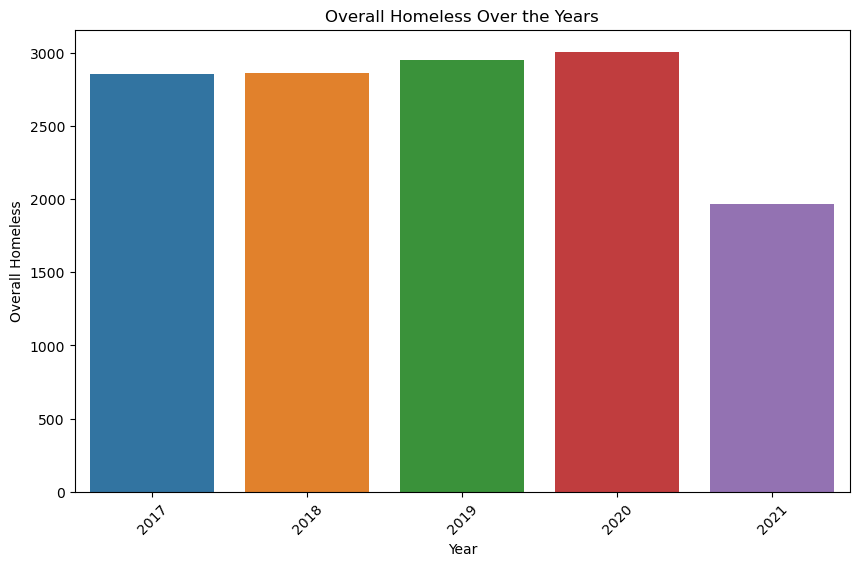

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Year', y='Overall Homeless', data=pc17_21, ci=None)  # ci=None disables error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years')
plt.xlabel('Year')
plt.ylabel('Overall Homeless')

# Show plot
plt.show()

2. Overall Homeless by Age Group

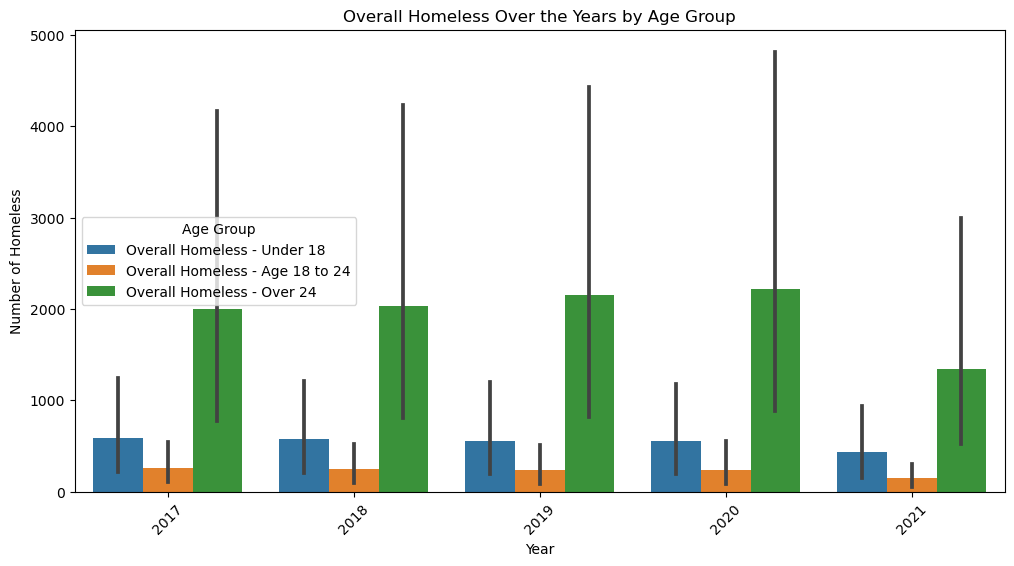

In [38]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Under 18', 
                                'Overall Homeless - Age 18 to 24', 
                                'Overall Homeless - Over 24'], 
                    var_name='Age Group', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Age Group', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Age Group')
plt.show()

3. Overall Homeless by Gender

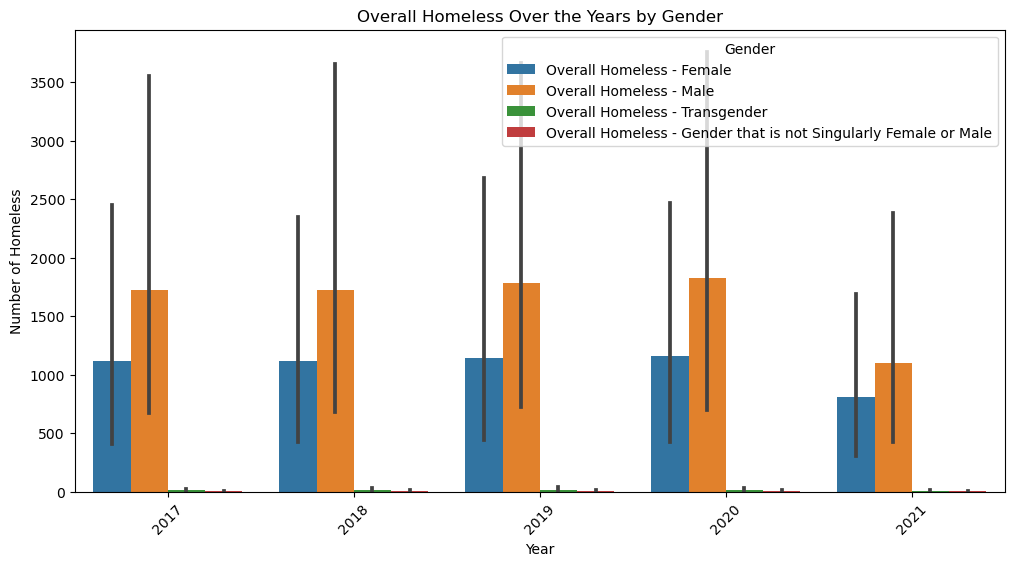

In [39]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Female', 
                                'Overall Homeless - Male', 
                                'Overall Homeless - Transgender',
                                'Overall Homeless - Gender that is not Singularly Female or Male'], 
                    var_name='Gender', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Gender', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Gender')
plt.show()

4. Overall Homeless by Ethnicity

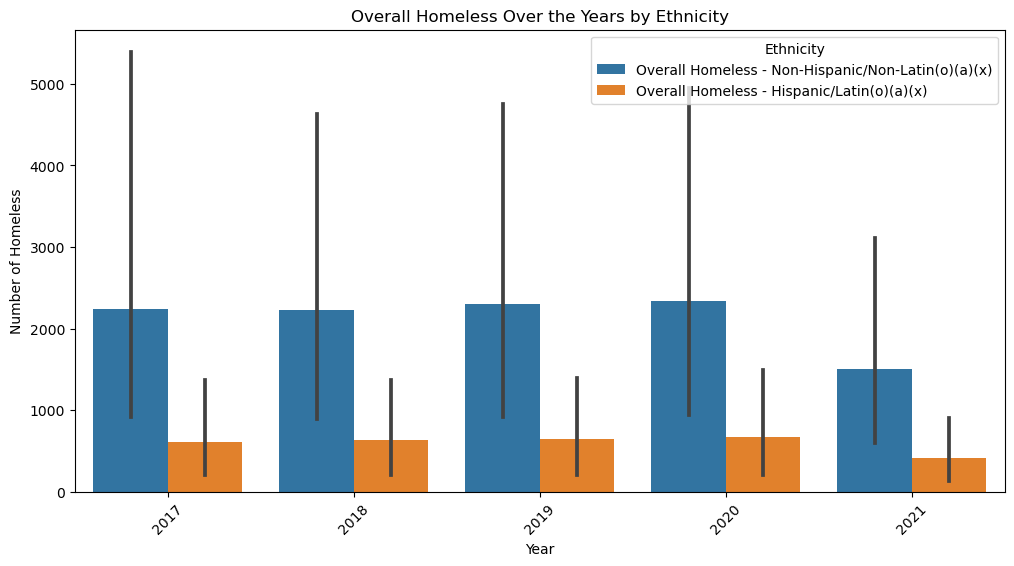

In [40]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 
                                'Overall Homeless - Hispanic/Latin(o)(a)(x)'], 
                    var_name='Ethnicity', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x
            ='Year', y='Number of Homeless', hue='Ethnicity', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Ethnicity')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Ethnicity')
plt.show()

5. Overall Homeless by Race

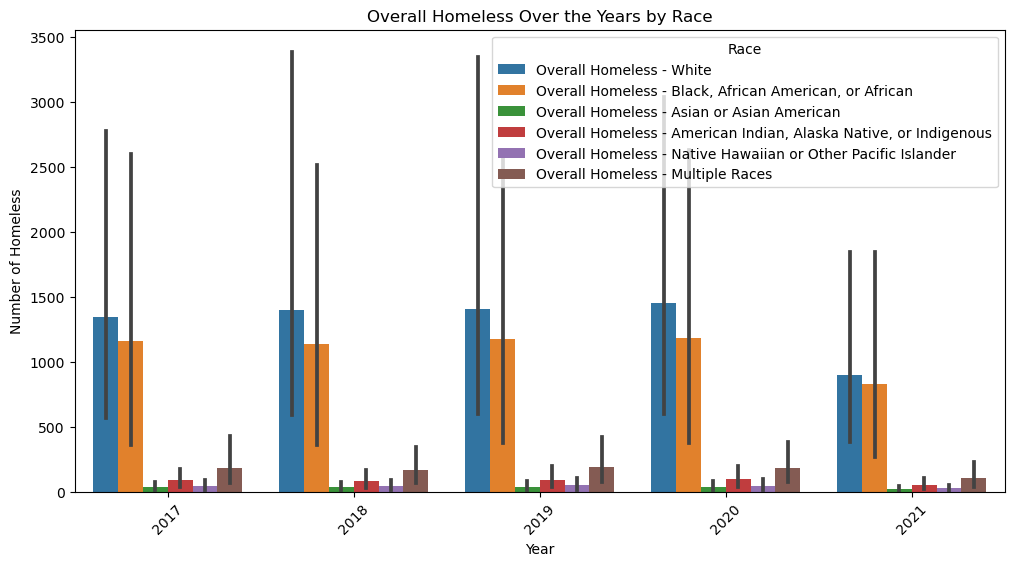

In [41]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - White', 
                                'Overall Homeless - Black, African American, or African',
                                'Overall Homeless - Asian or Asian American',
                                'Overall Homeless - American Indian, Alaska Native, or Indigenous',
                                'Overall Homeless - Native Hawaiian or Other Pacific Islander',
                                'Overall Homeless - Multiple Races'], 
                    var_name='Race', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Race', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Race')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Race')
plt.show()

6. Overall Chronically Homeless

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_1665/2303638671.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Overall Chronically Homeless', data=pc17_21, ci=None)  # ci=None disables error bars


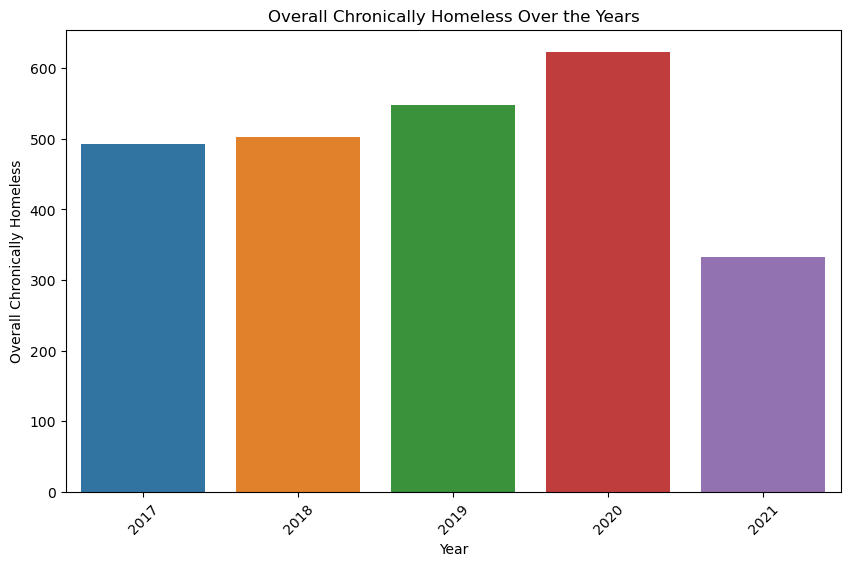

In [42]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Year', y='Overall Chronically Homeless', data=pc17_21, ci=None)  # ci=None disables error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Chronically Homeless Over the Years')
plt.xlabel('Year')
plt.ylabel('Overall Chronically Homeless')

# Show plot
plt.show()

Observations:
1. Across all the visualizations we see a downward trend in the number of homeless people on the street. 
2. We know that homelessness is a bigger problem today than ever before. 
3. The downward trend is probably due to the Covid-19 pandemic. Will have to bring in more data to create a clear picture.

## Bring in all the datasets available.

Steps:
1. Clean the datasets.
    - Make sure there are no commas in the numeric columns.
    - Nulls values
2. Check which columns are similar across the board.
3. Combine the datasets.
4. Add "State" column in all the datasets based on the CoC Name.
5. Create unique datasets:
    - Dataset that contains columns common in all the datasets, for indepth analysis of all the years PIT Count was conducted.
    - Dataset specific to Chronically Homeless.
6. Do Visualizations on Tableau.



In [46]:
# Define the list of files
all_files = ["PitCount_2007.csv", "PitCount_2008.csv", "PitCount_2009.csv", "PitCount_2010.csv", "PitCount_2011.csv","PitCount_2011.csv","PitCount_2012.csv","PitCount_2013.csv","PitCount_2014.csv","PitCount_2015.csv","PitCount_2016.csv","PitCount_2022.csv","PitCount_2023.csv"]

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Replace commas in each cell from "Overall Homeless" up to the last column excluding "Year"
    df.loc[:, "Overall Homeless":df.columns[-2]] = df.loc[:, "Overall Homeless":df.columns[-2]].replace(',', '', regex=True)
    
    # Convert columns from "Overall Homeless" up to the last column excluding "Year" to float
    df.loc[:, "Overall Homeless":df.columns[-2]] = df.loc[:, "Overall Homeless":df.columns[-2]].astype(float)
    
    # Add a "Year" column if it doesn't exist and insert the year based on the name of the dataset
    year = int(file.split("_")[1].split(".")[0])
    df["Year"] = year
    
    # Write the modified DataFrame back to CSV
    df.to_csv(file, index=False)



Check to see the Dtypes of all the columns.

## !!Check why 2008 does not have a Year column.

In [47]:
# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Print the data types of columns starting from "Overall Homeless"
    print("Data Types of Columns starting from 'Overall Homeless' in", file)
    print(df.loc[:,:].dtypes)
    print()

Data Types of Columns starting from 'Overall Homeless' in PitCount_2007.csv
CoC Number                                           object
CoC Name                                             object
Overall Homeless                                    float64
Sheltered ES Homeless                               float64
Sheltered TH Homeless                               float64
Sheltered Total Homeless                            float64
Unsheltered Homeless                                float64
Overall Homeless Individuals                        float64
Sheltered ES Homeless Individuals                   float64
Sheltered TH Homeless Individuals                   float64
Sheltered Total Homeless Individuals                float64
Unsheltered Homeless Individuals                    float64
Overall Homeless People in Families                 float64
Sheltered ES Homeless People in Families            float64
Sheltered TH Homeless People in Families            float64
Sheltered Total Homeless

Check how many Common columns between all the datasets.

In [51]:
# Initialize a set to store column names
common_columns = set(pc17_21.columns)

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Find common columns between the current dataset and pc17_21 dataset
    common_columns = common_columns.intersection(set(df.columns))

# Print common columns
if len(common_columns) > 0:
    print("Common columns among all the datasets are:")
    for col in common_columns:
        print(col)
else:
    print("There are no common columns between pc17_21 and other datasets.")

Common columns among all the datasets are:
CoC Name
Sheltered TH Homeless
Sheltered Total Homeless People in Families
Overall Homeless Family Households
Unsheltered Chronically Homeless Individuals
Unsheltered Homeless
Sheltered TH Homeless People in Families
Sheltered ES Homeless People in Families
Unsheltered Homeless Family Households
Overall Homeless Individuals
Year
Overall Homeless People in Families
Unsheltered Homeless People in Families
Sheltered ES Homeless Family Households
Sheltered Total Homeless Family Households
Sheltered TH Homeless Individuals
Sheltered Total Homeless
Overall Homeless
Sheltered Total Homeless Individuals
Sheltered ES Homeless Individuals
Sheltered Total Chronically Homeless Individuals
CoC Number
Unsheltered Homeless Individuals
Sheltered ES Homeless
Overall Chronically Homeless Individuals
Sheltered TH Homeless Family Households


### Null Values

In [49]:
# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Check for null values
    null_columns = df.columns[df.isnull().any()]
    
    # Print columns with null values along with the dataset name
    if len(null_columns) > 0:
        print(f"In file {file}, the following columns have null values:")
        for col in null_columns:
            print(col)
    else:
        print(f"In file {file}, there are no null values.")

In file PitCount_2007.csv, there are no null values.
In file PitCount_2008.csv, the following columns have null values:
CoC Number
CoC Name
In file PitCount_2009.csv, the following columns have null values:
Count Types
In file PitCount_2010.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2011.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2011.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2012.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2013.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2014.csv, the following columns have null values:
Count Types
In file PitCount_2015.csv, the following columns have null values:
Count Types
In file PitCount_2016.csv, the following columns have null values:
Count Types
In file PitCount_2022.csv, the following columns 

Dealing with Null values from column CoC Number and CoC Name
- Combine all the dataset: 2007 - 2023
- Drop rows with NaN in CoC Name & Overall Homeless using the same method as before.

This will help with us not loosing so many datapoints.

Combine all the datasets.

In [52]:
# Initialize the combined dataset with pc17_21
PitCount_07_23 = pc17_21.copy()

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Merge the datasets based on common columns
    PitCount_07_23 = pd.merge(PitCount_07_23, df, how='outer')

# Save the combined dataset
PitCount_07_23.to_csv("PC_07_23.csv", index=False)


In [56]:
for i in PitCount_07_23.columns:
    print(i)

CoC Number
CoC Name
Count Types
Overall Homeless
Overall Homeless - Under 18
Overall Homeless - Age 18 to 24
Overall Homeless - Over 24
Overall Homeless - Female
Overall Homeless - Male
Overall Homeless - Transgender
Overall Homeless - Gender that is not Singularly Female or Male
Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Overall Homeless - Hispanic/Latin(o)(a)(x)
Overall Homeless - White
Overall Homeless - Black, African American, or African
Overall Homeless - Asian or Asian American
Overall Homeless - American Indian, Alaska Native, or Indigenous
Overall Homeless - Native Hawaiian or Other Pacific Islander
Overall Homeless - Multiple Races
Sheltered ES Homeless
Sheltered ES Homeless - Under 18
Sheltered ES Homeless - Age 18 to 24
Sheltered ES Homeless - Over 24
Sheltered ES Homeless - Female
Sheltered ES Homeless - Male
Sheltered ES Homeless - Transgender
Sheltered ES Homeless - Gender that is not Singularly Female or Male
Sheltered ES Homeless - Non-Hispanic/Non-Latin(o)(a)(

In [53]:
PitCount_07_23.head()

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,1128.0,170.0,133.0,825.0,445.0,678.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717.0,135.0,53.0,529.0,320.0,397.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,1092.0,104.0,125.0,863.0,334.0,738.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606.0,116.0,35.0,455.0,222.0,383.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155.0,0.0,8.0,147.0,72.0,81.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
PitCount_07_23.shape

(6545, 663)

In [58]:
PitCount_07_23.isnull().sum()

CoC Number                                                  21
CoC Name                                                    22
Count Types                                                807
Overall Homeless                                             0
Overall Homeless - Under 18                               2305
                                                          ... 
Unsheltered Homeless People in Families - Age 25 to 34    6156
Unsheltered Homeless People in Families - Age 35 to 44    6156
Unsheltered Homeless People in Families - Age 45 to 54    6156
Unsheltered Homeless People in Families - Age 55 to 64    6156
Unsheltered Homeless People in Families - Over 64         6156
Length: 663, dtype: int64

Dealing with null values in this new dataset. Use the same method as before.

In [59]:
# Condition 1: Both 'CoC Name' is NaN and 'Overall Homeless' is 0.0
both_nan = PitCount_07_23[(PitCount_07_23['CoC Name'].isnull()) & (PitCount_07_23['Overall Homeless'] == 0.0)]
num_both_nan = len(both_nan)

# Condition 2: 'CoC Name' is NaN
coc_name_nan = PitCount_07_23[PitCount_07_23['CoC Name'].isnull()]
num_coc_name_nan = len(coc_name_nan)

# Condition 3: 'Overall Homeless' is 0.0
overall_homeless_zero = PitCount_07_23[PitCount_07_23['Overall Homeless'] == 0.0]
num_overall_homeless_zero = len(overall_homeless_zero)

# Print the number of rows for each condition
print(f"Number of rows with both 'CoC Name' as NaN and 'Overall Homeless' as 0.0: {num_both_nan}")
print(f"Number of rows with 'CoC Name' as NaN: {num_coc_name_nan}")
print(f"Number of rows with 'Overall Homeless' as 0.0: {num_overall_homeless_zero}")

# Print the rows for each condition
print("Rows with both 'CoC Name' as NaN and 'Overall Homeless' as 0.0:")
print(both_nan)

print("\nRows with 'CoC Name' as NaN:")
print(coc_name_nan)

print("\nRows with 'Overall Homeless' as 0.0:")
print(overall_homeless_zero)


Number of rows with both 'CoC Name' as NaN and 'Overall Homeless' as 0.0: 22
Number of rows with 'CoC Name' as NaN: 22
Number of rows with 'Overall Homeless' as 0.0: 22
Rows with both 'CoC Name' as NaN and 'Overall Homeless' as 0.0:
                                             CoC Number CoC Name Count Types  \
2697                                                NaN      NaN         NaN   
2698  a MO-604 covers territory in both Missouri and...      NaN         NaN   
3464                                                NaN      NaN         NaN   
3465  a MO-604 covers territory in both Missouri and...      NaN         NaN   
3847                                                NaN      NaN         NaN   
3848                                                NaN      NaN         NaN   
3849                                                NaN      NaN         NaN   
3850                                                NaN      NaN         NaN   
3851  a MO-604 covers territory in both Missour

NaN rows for Overall Homeless and CoC Name are the same. Drop the NaN

In [60]:
PitCount_07_23 = PitCount_07_23.drop(both_nan.index)

# Optionally, print the DataFrame to confirm that rows are dropped
PitCount_07_23.shape

(6523, 663)

In [61]:
PitCount_07_23.isnull().sum()

CoC Number                                                   7
CoC Name                                                     0
Count Types                                                785
Overall Homeless                                             0
Overall Homeless - Under 18                               2293
                                                          ... 
Unsheltered Homeless People in Families - Age 25 to 34    6138
Unsheltered Homeless People in Families - Age 35 to 44    6138
Unsheltered Homeless People in Families - Age 45 to 54    6138
Unsheltered Homeless People in Families - Age 55 to 64    6138
Unsheltered Homeless People in Families - Over 64         6138
Length: 663, dtype: int64

Deal with null values in CoC Number

In [173]:
# Filter rows where 'CoC Number' is null
coc_number_nan = PitCount_07_23[PitCount_07_23['CoC Number'].isnull()]

# Print the rows with null values in the 'CoC Number' column
coc_name_nan.head(10)

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
2697,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2698,a MO-604 covers territory in both Missouri and...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3464,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3465,a MO-604 covers territory in both Missouri and...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3847,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3848,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3849,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3850,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3851,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3852,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop rows where CoC Number is null. 

In [62]:
PitCount_07_23 = PitCount_07_23.dropna(subset= "CoC Number")

PitCount_07_23.isnull().sum()

CoC Number                                                   0
CoC Name                                                     0
Count Types                                                778
Overall Homeless                                             0
Overall Homeless - Under 18                               2291
                                                          ... 
Unsheltered Homeless People in Families - Age 25 to 34    6131
Unsheltered Homeless People in Families - Age 35 to 44    6131
Unsheltered Homeless People in Families - Age 45 to 54    6131
Unsheltered Homeless People in Families - Age 55 to 64    6131
Unsheltered Homeless People in Families - Over 64         6131
Length: 663, dtype: int64

Exploring column: Count Types

In [63]:
PitCount_07_23['Count Types'].unique()

array(['Sheltered and Unsheltered Count', nan, 'Sheltered-Only Count',
       'aa', 'Sheltered and Partial Unsheltered Count',
       'No 2010 PIT Count', 'Sheltered-Only Count*'], dtype=object)

## !! Check rows where Count Type == "No 2010 PIT Count"

In [64]:
no_2010_pit_count = PitCount_07_23(PitCount_07_23['Count Types'] == 'No 2010 PIT Count')

TypeError: 'DataFrame' object is not callable

Drop rows where Count Type = 

In [177]:
# Remove rows where 'Count Types' column has values 'aa' or 0
PitCount_07_23 = PitCount_07_23[(PitCount_07_23['Count Types'] != 'aa') & (PitCount_07_23['Count Types'] != 0)]

# Reset the index after removing rows
PitCount_07_23 = PitCount_07_23.reset_index(drop=True)

PitCount_07_23['Count Types'].unique()

array(['Sheltered and Unsheltered Count', nan, 'Sheltered-Only Count',
       'Sheltered and Partial Unsheltered Count', 'No 2010 PIT Count',
       'Sheltered-Only Count*'], dtype=object)

Going to fill NaN in Count Type by looking at the same CoC Name from previous year and filling the nan with that year's value.

# Stopped HERE!

## !! Update:
If the Count Type column == Nan - aa - 0
Then
- IF the year before and after are the same then insert that. 
- ELSEIF either of the year is == Sheltered and Unsheltered Count then insert this into the NaN. 
- ELSEIF either of the year is ==  Sheltered and Partial Unsheltered Count then insert this into the NaN.
- ELSEIF either of the year is == Sheltered-Only Count then insert this into the NaN.
- ELSEIF either of the year is == Sheltered-Only Count* then insert this into the NaN.


In [225]:
# Iterate over rows with NaN values in 'Count Types' column
for index, row in PitCount_07_23[PitCount_07_23['Count Types'].isnull()].iterrows():
    # Get CoC Number and Year of the current row
    coc_number = row['CoC Number']
    current_year = row['Year']
    
    # Find similar CoC Numbers from the year before and after
    similar_rows_before = PitCount_07_23[(PitCount_07_23['CoC Number'] == coc_number) & (PitCount_07_23['Year'] == current_year - 1) & (~PitCount_07_23['Count Types'].isnull())]
    similar_rows_after = PitCount_07_23[(PitCount_07_23['CoC Number'] == coc_number) & (PitCount_07_23['Year'] == current_year + 1) & (~PitCount_07_23['Count Types'].isnull())]
    
    # If similar rows are found and have the same 'Count Types', fill the NaN
    if len(similar_rows_before) > 0 and len(similar_rows_after) > 0:
        count_type_before = similar_rows_before.iloc[0]['Count Types']
        count_type_after = similar_rows_after.iloc[0]['Count Types']
        if count_type_before == count_type_after:
            PitCount_07_23.at[index, 'Count Types'] = count_type_before
    else:
        print("No such conditionality met.")


No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionali

No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionali

Since no such condition met - will be dropping the Nan columns under Count Type. The reason being that while we can impute the null values using Most Frequent Values on the column so even based on either what the previous year or next year Count Type was for the CoC Number, it wont really be accurate and could lead to overfitting.

Therefore will be droping all the Nan in Count Type.

In [226]:
# Drop rows with NaN values in 'Count Types' column. 
PitCount_07_23 = PitCount_07_23.dropna(subset=['Count Types'])

# Reset the index after dropping rows
PitCount_07_23 = PitCount_07_23.reset_index(drop=True)

#Print the unique values of Count Type
PitCount_07_23['Count Types'].unique()

array(['Sheltered and Unsheltered Count', 'Sheltered-Only Count',
       'Sheltered and Partial Unsheltered Count', 'No 2010 PIT Count',
       'Sheltered-Only Count*'], dtype=object)

1. Bringing the year column before Overall Homeless column.
2. Adding a state column and retriving that data from the CoC Number column. This will be used for visualization on a US Maps on Tableau.

In [227]:
# Remove the "Year" column from its current position
year_column = PitCount_07_23.pop("Year")

# Convert the "Year" column to integer type
year_column = year_column.astype(int)

# Insert the "Year" column right before the "Overall Homeless" column
overall_homeless_index = PitCount_07_23.columns.get_loc("Overall Homeless")
PitCount_07_23.insert(overall_homeless_index, "Year", year_column)

PitCount_07_23.head()


/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_8831/918942705.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PitCount_07_23.insert(overall_homeless_index, "Year", year_column)


,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,170.0,133.0,825.0,445.0,678.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,135.0,53.0,529.0,320.0,397.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,104.0,125.0,863.0,334.0,738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,116.0,35.0,455.0,222.0,383.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,0.0,8.0,147.0,72.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
PitCount_07_23['CoC Number'].unique()

array(['AK-500', 'AK-501', 'AL-500', 'AL-501', 'AL-502', 'AL-503',
       'AL-504', 'AL-505', 'AL-506', 'AL-507', 'AR-500', 'AR-501',
       'AR-503', 'AR-505', 'AR-508', 'AZ-500', 'AZ-501', 'AZ-502',
       'CA-500', 'CA-501', 'CA-502', 'CA-503', 'CA-504', 'CA-505',
       'CA-506', 'CA-507', 'CA-508', 'CA-509', 'CA-510', 'CA-511',
       'CA-512', 'CA-513', 'CA-514', 'CA-515', 'CA-516', 'CA-517',
       'CA-518', 'CA-519', 'CA-520', 'CA-521', 'CA-522', 'CA-523',
       'CA-524', 'CA-525', 'CA-526', 'CA-527', 'CA-529', 'CA-530',
       'CA-600', 'CA-601', 'CA-602', 'CA-603', 'CA-604', 'CA-606',
       'CA-607', 'CA-608', 'CA-609', 'CA-611', 'CA-612', 'CA-613',
       'CA-614', 'CO-500', 'CO-503', 'CO-504', 'CT-503', 'CT-505',
       'DC-500', 'DE-500', 'FL-500', 'FL-501', 'FL-502', 'FL-503',
       'FL-504', 'FL-505', 'FL-506', 'FL-507', 'FL-508', 'FL-509',
       'FL-510', 'FL-511', 'FL-512', 'FL-513', 'FL-514', 'FL-515',
       'FL-517', 'FL-518', 'FL-519', 'FL-520', 'FL-600', 'FL-6

In [229]:
# Define a dictionary mapping state abbreviations to full state names
state_territoies_map = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming",
    "DC": "District of Columbia",  # District of Columbia
    "AS": "American Samoa", "GU": "Guam", "MP": "Northern Mariana Islands", "PR": "Puerto Rico", "VI": "Virgin Islands"  # US Territories
}   


# Extract state abbreviation from "CoC Number" column
PitCount_07_23['State_Territory'] = PitCount_07_23['CoC Number'].str.split('-', expand=True)[0]

# Map state abbreviation to full state name
PitCount_07_23['State_Territory'] = PitCount_07_23['State_Territory'].map(state_territoies_map)

#Move the state column to the front of the dataset.

# Remove the "State" column from its current position
state_column = PitCount_07_23.pop("State_Territory")

# Find the index of the "CoC Number" column
coc_number_index = PitCount_07_23.columns.get_loc("CoC Number")

# Insert the "State" column right before the "CoC Number" column
PitCount_07_23.insert(coc_number_index, "State_Territory", state_column)


# Display the dataset with the new "State" column
PitCount_07_23.head()


/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_8831/2943814139.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PitCount_07_23['State_Territory'] = PitCount_07_23['CoC Number'].str.split('-', expand=True)[0]
/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_8831/2943814139.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PitCount_07_23.insert(coc_number_index, "State_Territory", state_column)


,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,170.0,133.0,825.0,445.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,135.0,53.0,529.0,320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,104.0,125.0,863.0,334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,116.0,35.0,455.0,222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,0.0,8.0,147.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
PitCount_07_23['State_Territory'].isnull().sum()

0

## New Dataset Creation

Creating specific datasets for visualizations.

- One dataset that had all the columns from the original 17 datasets.
- One dataset for only the chronically homeless.

In [231]:
# Define the columns to keep
columns_to_keep = [
    'State_Territory',
    'CoC Number',
    'CoC Name',
    'Count Types',
    'Year',
    'Overall Homeless',
    'Overall Homeless Individuals',
    'Overall Homeless People in Families',
    'Overall Homeless Family Households',
    'Overall Chronically Homeless Individuals',
    'Unsheltered Homeless',
    'Unsheltered Chronically Homeless Individuals',
    'Unsheltered Homeless Individuals',
    'Unsheltered Homeless People in Families',
    'Unsheltered Homeless Family Households',
    'Sheltered Total Homeless Individuals',
    'Sheltered Total Chronically Homeless Individuals',
    'Sheltered Total Homeless People in Families',
    'Sheltered ES Homeless Individuals',
    'Sheltered ES Homeless',
    'Sheltered ES Homeless Family Households',
    'Sheltered ES Homeless People in Families',
    'Sheltered Total Homeless Family Households',
    'Sheltered Total Homeless',
    'Sheltered TH Homeless',
    'Sheltered TH Homeless Individuals',
    'Sheltered TH Homeless People in Families',
    'Sheltered TH Homeless Family Households'
]

# Create a new DataFrame with the specified columns
general_homeless_cols = PitCount_07_23[columns_to_keep].copy()

# Save the new dataset to a CSV file
general_homeless_cols.to_csv("general_homeless_cols.csv", index=False)

general_homeless_cols.head()

,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,...,Sheltered ES Homeless Individuals,Sheltered ES Homeless,Sheltered ES Homeless Family Households,Sheltered ES Homeless People in Families,Sheltered Total Homeless Family Households,Sheltered Total Homeless,Sheltered TH Homeless,Sheltered TH Homeless Individuals,Sheltered TH Homeless People in Families,Sheltered TH Homeless Family Households
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,280.0,87.0,114.0,...,548.0,654.0,34.0,106.0,87.0,973.0,319.0,145.0,174.0,53.0
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,211.0,78.0,102.0,...,244.0,363.0,46.0,119.0,78.0,578.0,215.0,123.0,92.0,32.0
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,160.0,60.0,89.0,...,435.0,540.0,38.0,105.0,60.0,875.0,304.0,249.0,55.0,22.0
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,180.0,57.0,65.0,...,121.0,196.0,24.0,75.0,52.0,341.0,145.0,58.0,87.0,28.0
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,0.0,0.0,24.0,...,27.0,27.0,0.0,0.0,0.0,133.0,106.0,106.0,0.0,0.0


In [232]:
general_homeless_cols.isnull().sum()

State_Territory                                     0
CoC Number                                          0
CoC Name                                            0
Count Types                                         0
Year                                                0
Overall Homeless                                    0
Overall Homeless Individuals                        0
Overall Homeless People in Families                 0
Overall Homeless Family Households                  0
Overall Chronically Homeless Individuals            0
Unsheltered Homeless                                0
Unsheltered Chronically Homeless Individuals        0
Unsheltered Homeless Individuals                    0
Unsheltered Homeless People in Families             0
Unsheltered Homeless Family Households              0
Sheltered Total Homeless Individuals                0
Sheltered Total Chronically Homeless Individuals    0
Sheltered Total Homeless People in Families         0
Sheltered ES Homeless Indivi

General_Homeless_dataset created!

Now creating a specified Chronically Homeless Dataset.

In [233]:
# Filter columns containing "Chronically" in their names
chronic_columns = PitCount_07_23.filter(like='Chronically')

# Specify the columns for the new dataset
columns_to_keep = [
    'State_Territory',  # Assuming the State column has been already mapped to full state names
    'CoC Number',
    'CoC Name',
    'Count Types',
    'Year',
    'Overall Homeless',
    'Overall Homeless Individuals'
]

# Create a new DataFrame starting with the specified columns and including the chronic_columns
chronic_dataset = PitCount_07_23[columns_to_keep].join(chronic_columns)

# Save the new dataset to a CSV file
chronic_dataset.to_csv("chronic_dataset.csv", index=False)

# Display the first few rows of the new dataset
chronic_dataset.head()


,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Chronically Homeless,Sheltered ES Chronically Homeless,Sheltered SH Chronically Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,116.0,72.0,0.0,...,44.0,114.0,70.0,0.0,70.0,44.0,2.0,2.0,2.0,0.0
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,141.0,86.0,0.0,...,55.0,102.0,47.0,0.0,47.0,55.0,39.0,39.0,39.0,0.0
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,92.0,27.0,4.0,...,61.0,89.0,24.0,4.0,28.0,61.0,3.0,3.0,3.0,0.0
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,65.0,9.0,0.0,...,56.0,65.0,9.0,0.0,9.0,56.0,0.0,0.0,0.0,0.0
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,24.0,10.0,0.0,...,14.0,24.0,10.0,0.0,10.0,14.0,0.0,0.0,0.0,0.0


In [234]:
chronic_dataset.shape

(5737, 21)

In [235]:
chronic_dataset.isnull().sum()

State_Territory                                              0
CoC Number                                                   0
CoC Name                                                     0
Count Types                                                  0
Year                                                         0
Overall Homeless                                             0
Overall Homeless Individuals                                 0
Overall Chronically Homeless                               762
Sheltered ES Chronically Homeless                          762
Sheltered SH Chronically Homeless                          381
Sheltered Total Chronically Homeless                       762
Unsheltered Chronically Homeless                           762
Overall Chronically Homeless Individuals                     0
Sheltered ES Chronically Homeless Individuals                0
Sheltered SH Chronically Homeless Individuals              381
Sheltered Total Chronically Homeless Individuals       

Trying to find if the null values in this dataset are coming from specific years knowing that not all original datasets had the same number of columns.

In [236]:
# Filter the dataset to include only rows with null values
null_values_dataset = chronic_dataset[chronic_dataset.isnull().any(axis=1)]

# Extract the unique years from the filtered dataset
unique_years_with_null = null_values_dataset['Year'].unique()

# Print the unique years with null values
print("Unique years with null values:")
print(unique_years_with_null)

null_values_dataset.head()

Unique years with null values:
[2009 2010]


,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Chronically Homeless,Sheltered ES Chronically Homeless,Sheltered SH Chronically Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
1920,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2009,1267.0,821.0,NaN,NaN,NaN,...,NaN,198.0,152.0,NaN,152.0,46.0,NaN,NaN,NaN,NaN
1921,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2009,725.0,418.0,NaN,NaN,NaN,...,NaN,125.0,93.0,NaN,93.0,32.0,NaN,NaN,NaN,NaN
1922,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2009,2273.0,1645.0,NaN,NaN,NaN,...,NaN,611.0,285.0,NaN,285.0,326.0,NaN,NaN,NaN,NaN
1923,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2009,747.0,572.0,NaN,NaN,NaN,...,NaN,73.0,34.0,NaN,34.0,39.0,NaN,NaN,NaN,NaN
1924,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2009,281.0,222.0,NaN,NaN,NaN,...,NaN,9.0,6.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN


In [237]:
null_values_dataset.shape

(762, 21)

I will not be droping these NaN values from the dataset, because some of the other columns in these rows have good values to explore.

When building Machine Learning Models will create these models where:
1. Null values are filled with a zero.
2. Null Values are drops
3. Null Values are replaced with the mean of the column.

## SQL Exploration

Ideas to explore:
1. Average homeless growth in each state since 2007, in descending order.
2. Ratio of Overall Homeless Individuals to Overall Chronically Homeless Individuals.
3. Growth of Overall Chronically Homeless from 2011 to 2023
4. CoC with the Highest Record Homeless Population.
5. Percentage of Overall Homeless Individuals that are Sheltered Homeless Individuals.
6. Percentage of Overall Chronically Homeless Individuals that are Sheltered Chronically Homeless Individuals.

In [238]:
from pandasql import sqldf

#Average homeless growth in each state since 2007.


# Define the SQL query
query = """
    SELECT State_Territory, AVG("Overall Homeless") AS Avg_Homeless_Growth
    FROM chronic_dataset
    WHERE Year >= 2007
    GROUP BY State_Territory
    ORDER BY Avg_Homeless_Growth DESC
"""

# Execute the SQL query
result = sqldf(query)

# Print the result
print(result)


             State_Territory  Avg_Homeless_Growth
0       District of Columbia          6549.933333
1                    Arizona          3643.244444
2                   Colorado          3623.693878
3                 Washington          3508.055556
4                   New York          3151.600000
5                     Hawaii          3138.133333
6                 California          3060.607874
7                    Indiana          2928.400000
8                     Nevada          2767.177778
9                      Maine          2649.933333
10                     Texas          2538.145455
11                    Oregon          2058.036036
12               Connecticut          1875.766667
13                   Georgia          1659.031496
14                   Montana          1637.466667
15               Puerto Rico          1603.866667
16                  Kentucky          1557.600000
17                New Mexico          1500.300000
18             Massachusetts          1481.464481


In [239]:
# Ratio of Overall Homeless Individuals to Overall Chronically Homeless Individuals.
query = """
    SELECT State_Territory, AVG("Overall Homeless Individuals"/ "Overall Chronically Homeless Individuals") AS Ratio
    FROM chronic_dataset
    GROUP BY State_Territory
    Order by Ratio DESC;
"""

result = sqldf(query)
print(result)

             State_Territory      Ratio
0   Northern Mariana Islands  19.227273
1               Pennsylvania  12.110747
2                   New York  12.072889
3                    Alabama  11.995942
4                       Guam  11.770448
5                Mississippi  11.397608
6                   Michigan   9.430800
7                       Ohio   9.173182
8                  Wisconsin   9.033931
9                 New Jersey   8.981079
10                 Louisiana   8.606185
11                    Nevada   8.428857
12               Connecticut   8.407324
13                 Tennessee   8.330368
14                   Wyoming   8.257956
15                  Nebraska   8.146325
16                   Indiana   8.057824
17                  Illinois   7.818262
18              North Dakota   7.656008
19                    Kansas   7.459497
20              South Dakota   7.434560
21                   Georgia   7.279485
22                     Idaho   7.204673
23                      Utah   7.135306


In [240]:
#Growth of Overall Chronically Homeless from 2011 to 2023
query = """
    SELECT State_Territory,
           (AVG("Overall Chronically Homeless" * 1.0) - AVG(CASE WHEN Year = 2011 THEN "Overall Chronically Homeless" END * 1.0)) / 13 AS Average_Growth
    FROM chronic_dataset
    WHERE Year BETWEEN 2011 AND 2023
    GROUP BY State_Territory
    ORDER BY Average_Growth DESC;
"""

result = sqldf(query)
print(result)



             State_Territory  Average_Growth
0                 Washington       25.460552
1                     Hawaii       18.642012
2                   Colorado       16.838402
3                   New York        7.487111
4               South Dakota        7.301775
5               Rhode Island        6.994083
6                 California        5.615896
7                   Delaware        5.378698
8                      Maine        4.615385
9                    Vermont        4.426036
10              North Dakota        3.017751
11                    Alaska        2.558462
12                      Utah        2.514793
13             Massachusetts        2.432367
14                    Oregon        2.170388
15             New Hampshire        1.968442
16                New Jersey        1.913671
17                   Wyoming        1.355030
18            South Carolina        1.303254
19                 Wisconsin        0.591716
20                  Oklahoma        0.517751
21        

In [241]:
#CoC Name with the Highest Record Homeless Population.
chronic_dataset.columns = chronic_dataset.columns.str.replace(' ', '_')

# Define the SQL query
query = """
SELECT Year, CoC_Name, MAX("Overall_Homeless") AS Max_Homeless_Population
FROM chronic_dataset
GROUP BY CoC_Name
ORDER BY Max_Homeless_Population DESC
LIMIT 5;
"""

# Execute the SQL query
result = sqldf(query)

# Print the result
print(result)

   Year                       CoC_Name  Max_Homeless_Population
0  2023              New York City CoC                  88025.0
1  2023  Los Angeles City & County CoC                  71320.0
2  2009     Texas Balance of State CoC                  15327.0
3  2023        Seattle/King County CoC                  14149.0
4  2011   Georgia Balance of State CoC                  11168.0


# Machine Learning Models

In [242]:
general_homeless_cols.isnull().sum()

State_Territory                                     0
CoC Number                                          0
CoC Name                                            0
Count Types                                         0
Year                                                0
Overall Homeless                                    0
Overall Homeless Individuals                        0
Overall Homeless People in Families                 0
Overall Homeless Family Households                  0
Overall Chronically Homeless Individuals            0
Unsheltered Homeless                                0
Unsheltered Chronically Homeless Individuals        0
Unsheltered Homeless Individuals                    0
Unsheltered Homeless People in Families             0
Unsheltered Homeless Family Households              0
Sheltered Total Homeless Individuals                0
Sheltered Total Chronically Homeless Individuals    0
Sheltered Total Homeless People in Families         0
Sheltered ES Homeless Indivi

In [243]:
general_homeless_cols.columns

Index(['State_Territory', 'CoC Number', 'CoC Name', 'Count Types', 'Year',
       'Overall Homeless', 'Overall Homeless Individuals',
       'Overall Homeless People in Families',
       'Overall Homeless Family Households',
       'Overall Chronically Homeless Individuals', 'Unsheltered Homeless',
       'Unsheltered Chronically Homeless Individuals',
       'Unsheltered Homeless Individuals',
       'Unsheltered Homeless People in Families',
       'Unsheltered Homeless Family Households',
       'Sheltered Total Homeless Individuals',
       'Sheltered Total Chronically Homeless Individuals',
       'Sheltered Total Homeless People in Families',
       'Sheltered ES Homeless Individuals', 'Sheltered ES Homeless',
       'Sheltered ES Homeless Family Households',
       'Sheltered ES Homeless People in Families',
       'Sheltered Total Homeless Family Households',
       'Sheltered Total Homeless', 'Sheltered TH Homeless',
       'Sheltered TH Homeless Individuals',
       'Sheltere

## Hierarchical Clustering - Count Types

In [244]:
general_homeless_cols_2 = general_homeless_cols.drop('CoC Number', axis=1)

general_homeless_cols_2.head()

,State_Territory,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,Unsheltered Homeless,...,Sheltered ES Homeless Individuals,Sheltered ES Homeless,Sheltered ES Homeless Family Households,Sheltered ES Homeless People in Families,Sheltered Total Homeless Family Households,Sheltered Total Homeless,Sheltered TH Homeless,Sheltered TH Homeless Individuals,Sheltered TH Homeless People in Families,Sheltered TH Homeless Family Households
0,Alaska,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,280.0,87.0,114.0,155.0,...,548.0,654.0,34.0,106.0,87.0,973.0,319.0,145.0,174.0,53.0
1,Alaska,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,211.0,78.0,102.0,139.0,...,244.0,363.0,46.0,119.0,78.0,578.0,215.0,123.0,92.0,32.0
2,Alabama,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,160.0,60.0,89.0,217.0,...,435.0,540.0,38.0,105.0,60.0,875.0,304.0,249.0,55.0,22.0
3,Alabama,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,180.0,57.0,65.0,265.0,...,121.0,196.0,24.0,75.0,52.0,341.0,145.0,58.0,87.0,28.0
4,Alabama,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,0.0,0.0,24.0,22.0,...,27.0,27.0,0.0,0.0,0.0,133.0,106.0,106.0,0.0,0.0


In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# One-hot encode the categorical columns
categorical_columns = ['State_Territory', 'CoC Name']
df_encoded = pd.get_dummies(general_homeless_cols_2, columns=categorical_columns)

# Exclude 'Count Types' which you need to keep as labels or for other purposes
df_encoded = df_encoded.drop(columns=['Count Types'])

# Standardize the data (now including the one-hot encoded columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

print(scaled_data)

[[ 0.22649325 -0.08447576 -0.05088606 ... -0.04765647 -0.05120021
  -0.05120021]
 [ 0.22649325 -0.17646297 -0.17726429 ... -0.04765647 -0.05120021
  -0.05120021]
 [ 0.22649325 -0.09253303 -0.0198458  ... -0.04765647 -0.05120021
  -0.05120021]
 ...
 [ 1.6147323  -0.27135976 -0.26816792 ... -0.04765647 -0.05120021
  -0.05120021]
 [ 1.6147323  -0.16549613 -0.11222754 ... -0.04765647 -0.05120021
  -0.05120021]
 [ 1.6147323  -0.21786841 -0.17948145 ... -0.04765647 -0.05120021
  -0.05120021]]


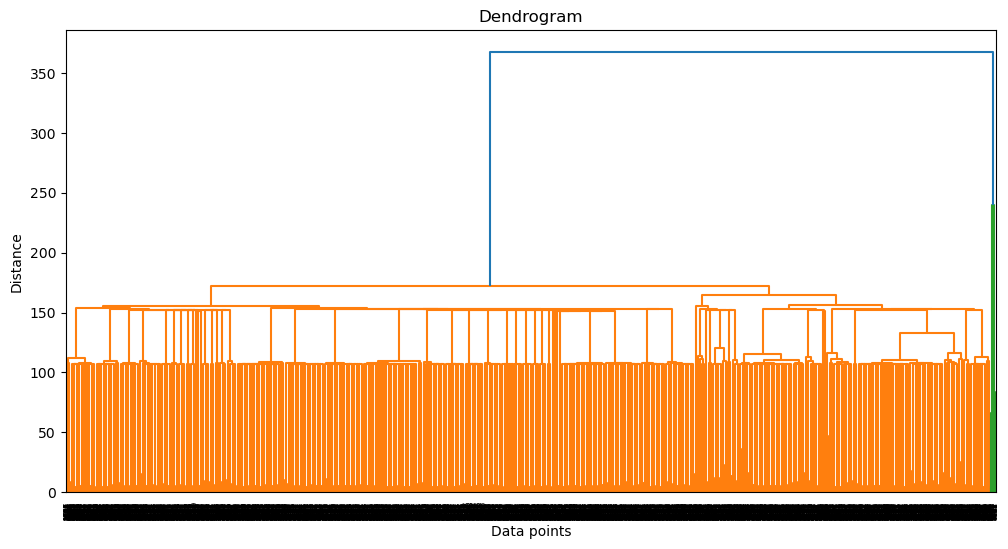

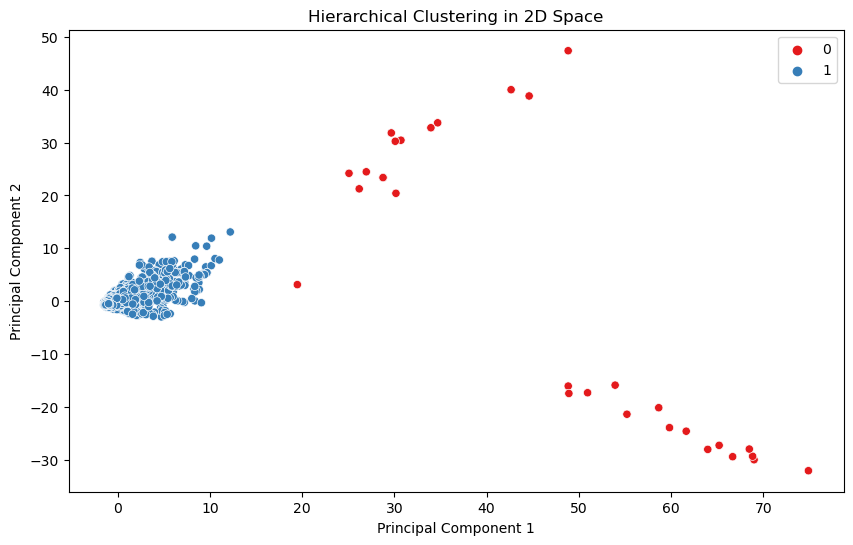

In [246]:
# We will use Ward linkage and let the algorithm determine the number of clusters
clustering = AgglomerativeClustering(linkage='ward').fit(scaled_data)

# Plotting a dendrogram to visualize the hierarchical clustering
# This helps in determining the optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Since the dataset now includes many dimensions, we should reduce dimensions to plot.
# Let's use PCA to reduce dimensions to 2D for visualization.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plotting the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=clustering.labels_, palette='Set1', legend='full')
plt.title('Hierarchical Clustering in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Analyzing the structure

In [247]:
general_homeless_cols_2['Cluster'] = clustering.labels_

# Calculate mean for all numerical columns by cluster
cluster_means = general_homeless_cols_2.groupby('Cluster').mean()

# Calculate counts or modes for categorical columns by cluste
cluster_modes = general_homeless_cols_2.groupby('Cluster').agg(pd.Series.mode)  # You may need to adjust this if modes are multi-modal


/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_8831/2428833837.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = general_homeless_cols_2.groupby('Cluster').mean()
/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_8831/2428833837.py:7: FutureWarning: ['Year', 'Overall Homeless Family Households', 'Unsheltered Homeless', 'Unsheltered Chronically Homeless Individuals', 'Unsheltered Homeless Individuals', 'Sheltered Total Homeless People in Families', 'Sheltered Total Homeless Family Households', 'Sheltered TH Homeless', 'Sheltered TH Homeless Family Households'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_modes = general_homeless_cols_2.groupby('Clu

In [248]:
cluster_modes.head()

,State_Territory,CoC Name,Count Types,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Chronically Homeless Individuals,Unsheltered Homeless People in Families,Unsheltered Homeless Family Households,Sheltered Total Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Sheltered ES Homeless Individuals,Sheltered ES Homeless,Sheltered ES Homeless Family Households,Sheltered ES Homeless People in Families,Sheltered Total Homeless,Sheltered TH Homeless Individuals,Sheltered TH Homeless People in Families
Cluster,,,,,,,,,,,,,,,,,,
0,"[California, New York]","[Los Angeles City & County CoC, New York City ...",Sheltered and Unsheltered Count,33243.0,28358.0,4885.0,7661.0,0.0,0.0,10176.0,2414.0,4513.0,5793.0,432.0,1280.0,14050.0,5663.0,2594.0
1,California,"[Akron, Barberton/Summit County CoC, Alabama B...",Sheltered and Unsheltered Count,372.0,176.0,94.0,0.0,0.0,0.0,77.0,0.0,38.0,"[122.0, 173.0]",9.0,0.0,"[160.0, 234.0]",0.0,0.0


### Hierarchical Clustering

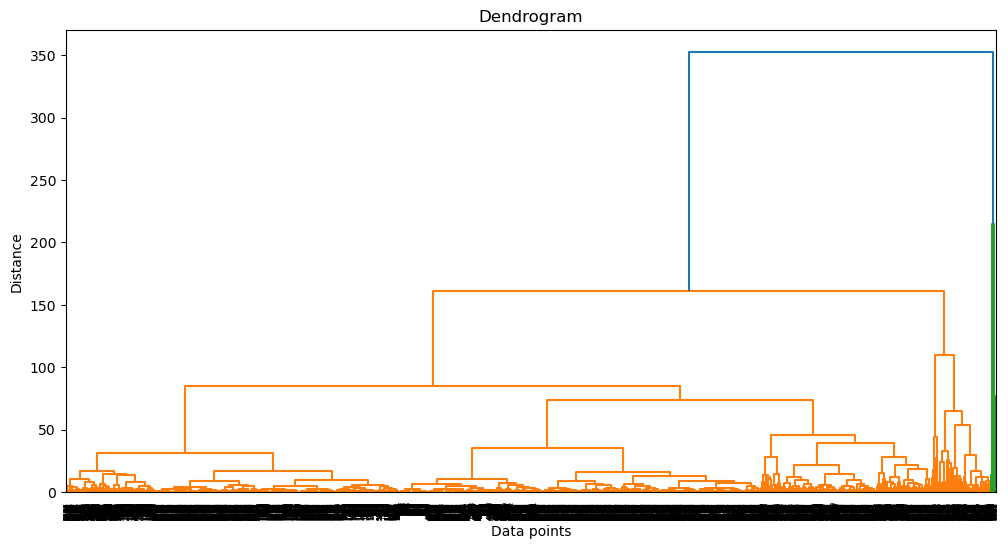

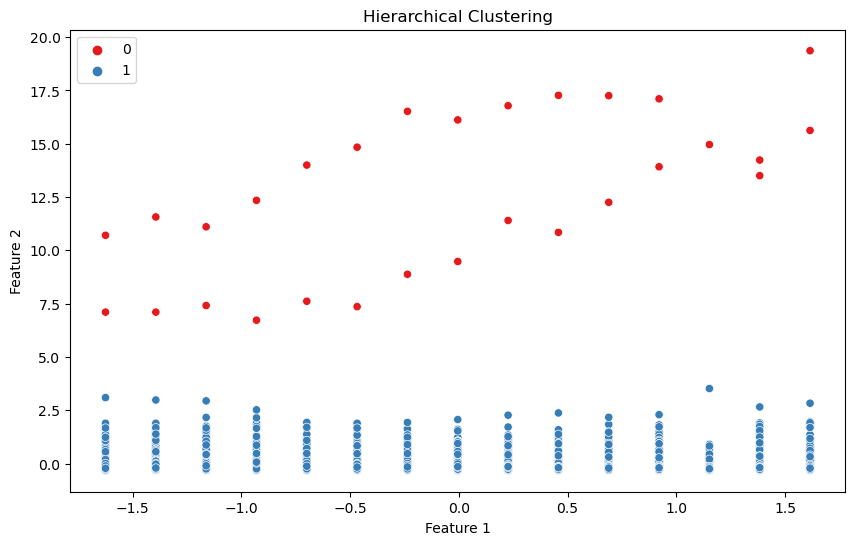

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Drop non-numeric columns
numeric_df = general_homeless_cols.drop(columns=['State_Territory', 'CoC Number', 'CoC Name', 'Count Types'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# We will use Ward linkage and let the algorithm determine the number of clusters
clustering = AgglomerativeClustering(linkage='ward').fit(scaled_data)

# Plotting a dendrogram to visualize the hierarchical clustering
# This helps in determining the optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=clustering.labels_, palette='Set1', legend='full')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Time Series

Model Assumption: 
- Stationary: The time series has its statistical properties remain constant across time.
ARIMA: Is a general class of models
- Three components: AR+I+MA (p, d, q)
- AR (Auo Regressive): the time series is lineraly regressed on its own past value.
    - p: the number of past values included in the AR model
- I (Integrated): if not stationary, the time series can be differenced to become stationary. 
    - d: he number of times the time series is differenced
- MA (Moving Average): the time series is 'regressed' on the past forecast erros.
    - q: the number of past forecast errors included in the MA model.

Rule of thumb in selecting (p,d,q) values:
- IF the PACF plot has a significant spike at lag p, but not beyond and the ACF plot decays more gradually. This may suggest an ARIMA (p,d,0) model.
- If the ACF plot has a significant spike at lag q, but not beyond and PACF plot decays more gradually. This may suggest an ARIMA (0,d,q) model.

(PACF measures the balances variance of the lag.)

ACF Plot and PACF Plot
- ACF is the correlation of the time series with tis lags.
- PACF is hte partial correlation of the time series with its lags, after removing the effects of lower-order-lags between them. 


1. No Duplicate values
    - Deal with duplicates by pivoting the table. Categories like Office Supplies and Toilet paper become columns of their own.
2. No Null Values


- Setting the Index
    - Having a column the indicates the day of the week, like monday = 0, Sunday = 6. so we can find out if the weekends had more sales.

- Resampling
    - UpSampling: Going from days to years
    - Down Sampling: Going to Years to days.
    - Changing the frequency from years to months to days to months to years etc.

- Variable Transformation

- Stationary Models
    - A stationary model has the same mean and variance over time.
    - For a dataset to be stationary it must have these four properties:
        - Mean stay contact
            - Mean stays consisent through out. Rolling average.
        - Variance stay consistent over time
        - Consistent autocorrelation structure through out the series.
            - Autocorelation is a key concept in time series.
            - Means todays measurament is dependant on a past values.
            - Time interval between correlated values is called a **Lag**  
        - No periodic component. 
            - 


### ARIMA Model

In [250]:
general_homeless_cols.head()

,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,...,Sheltered ES Homeless Individuals,Sheltered ES Homeless,Sheltered ES Homeless Family Households,Sheltered ES Homeless People in Families,Sheltered Total Homeless Family Households,Sheltered Total Homeless,Sheltered TH Homeless,Sheltered TH Homeless Individuals,Sheltered TH Homeless People in Families,Sheltered TH Homeless Family Households
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,280.0,87.0,114.0,...,548.0,654.0,34.0,106.0,87.0,973.0,319.0,145.0,174.0,53.0
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,211.0,78.0,102.0,...,244.0,363.0,46.0,119.0,78.0,578.0,215.0,123.0,92.0,32.0
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,160.0,60.0,89.0,...,435.0,540.0,38.0,105.0,60.0,875.0,304.0,249.0,55.0,22.0
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,180.0,57.0,65.0,...,121.0,196.0,24.0,75.0,52.0,341.0,145.0,58.0,87.0,28.0
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,0.0,0.0,24.0,...,27.0,27.0,0.0,0.0,0.0,133.0,106.0,106.0,0.0,0.0


In [251]:
general_homeless_cols = general_homeless_cols.drop(columns=['CoC Number'])

general_homeless_cols.head()

,State_Territory,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,Unsheltered Homeless,...,Sheltered ES Homeless Individuals,Sheltered ES Homeless,Sheltered ES Homeless Family Households,Sheltered ES Homeless People in Families,Sheltered Total Homeless Family Households,Sheltered Total Homeless,Sheltered TH Homeless,Sheltered TH Homeless Individuals,Sheltered TH Homeless People in Families,Sheltered TH Homeless Family Households
0,Alaska,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,280.0,87.0,114.0,155.0,...,548.0,654.0,34.0,106.0,87.0,973.0,319.0,145.0,174.0,53.0
1,Alaska,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,211.0,78.0,102.0,139.0,...,244.0,363.0,46.0,119.0,78.0,578.0,215.0,123.0,92.0,32.0
2,Alabama,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,160.0,60.0,89.0,217.0,...,435.0,540.0,38.0,105.0,60.0,875.0,304.0,249.0,55.0,22.0
3,Alabama,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,180.0,57.0,65.0,265.0,...,121.0,196.0,24.0,75.0,52.0,341.0,145.0,58.0,87.0,28.0
4,Alabama,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,0.0,0.0,24.0,22.0,...,27.0,27.0,0.0,0.0,0.0,133.0,106.0,106.0,0.0,0.0


In [252]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns
categorical_columns = ['State_Territory', 'CoC Name', 'Count Types']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical data
encoded_categorical = encoder.fit_transform(general_homeless_cols[categorical_columns])

# Create a DataFrame from the encoded variables
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original data (excluding the original categorical columns)
general_data_preprocessed = pd.concat([general_homeless_cols.drop(columns=categorical_columns), encoded_categorical_df], axis=1)

general_data_preprocessed.head()

,Year,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,Unsheltered Homeless,Unsheltered Chronically Homeless Individuals,Unsheltered Homeless Individuals,Unsheltered Homeless People in Families,...,CoC Name_Wyoming Statewide CoC,"CoC Name_Yonkers, Mount Vernon/Westchester County CoC",CoC Name_York City & County CoC,CoC Name_Youngstown/Mahoning County CoC,CoC Name_Yuba City & County/Sutter County CoC,Count Types_No 2010 PIT Count,Count Types_Sheltered and Partial Unsheltered Count,Count Types_Sheltered and Unsheltered Count,Count Types_Sheltered-Only Count,Count Types_Sheltered-Only Count*
0,2017,1128.0,848.0,280.0,87.0,114.0,155.0,44.0,155.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2017,717.0,506.0,211.0,78.0,102.0,139.0,55.0,139.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2017,1092.0,932.0,160.0,60.0,89.0,217.0,61.0,217.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2017,606.0,426.0,180.0,57.0,65.0,265.0,56.0,247.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2017,155.0,155.0,0.0,0.0,24.0,22.0,14.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [253]:
# Set 'Year' as the datetime index
general_data_preprocessed['Year'] = pd.to_datetime(general_data_preprocessed['Year'], format='%Y')
general_data_preprocessed.set_index('Year', inplace=True)

general_data_preprocessed.head()

,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,Unsheltered Homeless,Unsheltered Chronically Homeless Individuals,Unsheltered Homeless Individuals,Unsheltered Homeless People in Families,Unsheltered Homeless Family Households,...,CoC Name_Wyoming Statewide CoC,"CoC Name_Yonkers, Mount Vernon/Westchester County CoC",CoC Name_York City & County CoC,CoC Name_Youngstown/Mahoning County CoC,CoC Name_Yuba City & County/Sutter County CoC,Count Types_No 2010 PIT Count,Count Types_Sheltered and Partial Unsheltered Count,Count Types_Sheltered and Unsheltered Count,Count Types_Sheltered-Only Count,Count Types_Sheltered-Only Count*
Year,,,,,,,,,,,,,,,,,,,,,
2017-01-01,1128.0,848.0,280.0,87.0,114.0,155.0,44.0,155.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-01-01,717.0,506.0,211.0,78.0,102.0,139.0,55.0,139.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-01-01,1092.0,932.0,160.0,60.0,89.0,217.0,61.0,217.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-01-01,606.0,426.0,180.0,57.0,65.0,265.0,56.0,247.0,18.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-01-01,155.0,155.0,0.0,0.0,24.0,22.0,14.0,22.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


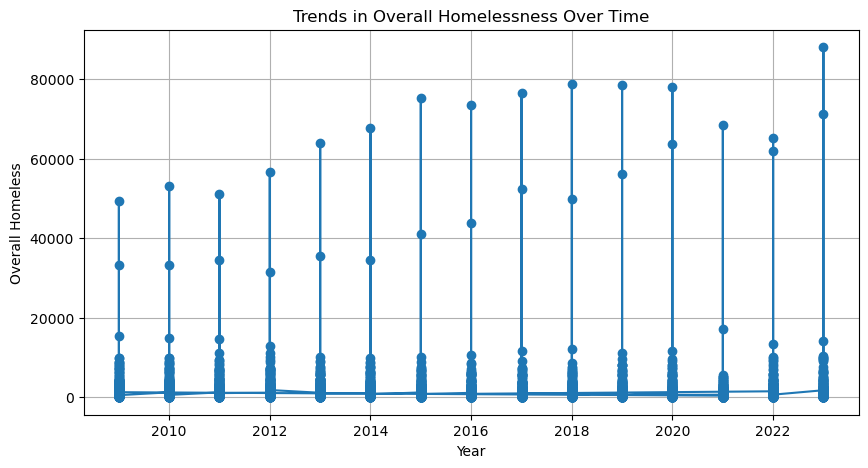

In [254]:
import matplotlib.pyplot as plt

# Plotting the 'Overall Homeless' data
plt.figure(figsize=(10, 5))
plt.plot(general_data_preprocessed.index, general_data_preprocessed['Overall Homeless'], marker='o', linestyle='-')
plt.title('Trends in Overall Homelessness Over Time')
plt.xlabel('Year')
plt.ylabel('Overall Homeless')
plt.grid(True)
plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has bee

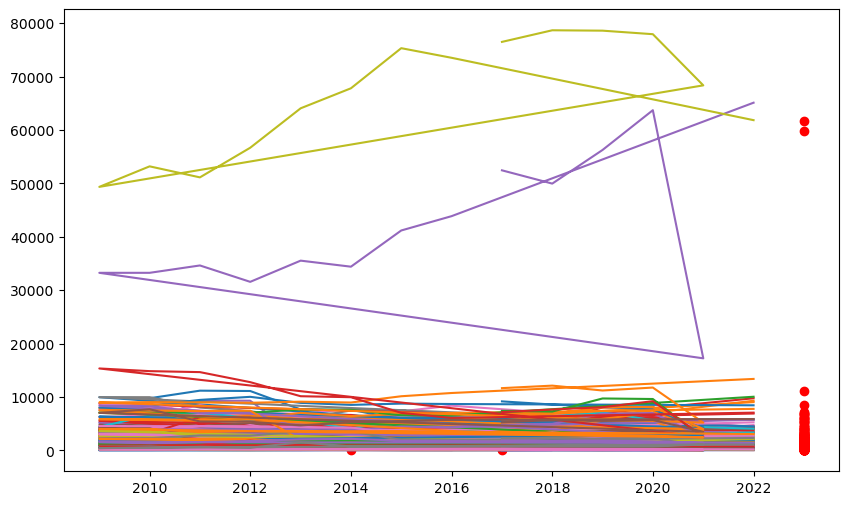

In [255]:
from statsmodels.tsa.arima.model import ARIMA

general_data_preprocessed = general_data_preprocessed[general_data_preprocessed.index.year != general_data_preprocessed.index.max().year]

# Filter columns for each CoC and predict
coc_columns = [col for col in general_data_preprocessed.columns if 'CoC Name_' in col]
predictions = {}

# Initialize a plot for visual comparison
plt.figure(figsize=(10, 6))

for coc in coc_columns:
    # Selecting the series for each CoC
    series = general_data_preprocessed[general_data_preprocessed[coc] == 1]['Overall Homeless']
    
    # Check if the series has enough data
    if len(series) > 3:  # Ensure there are more than 3 data points
        try:
            # Fit ARIMA model
            model = ARIMA(series, order=(3,1,1))
            model_fit = model.fit()
            
            # Predict the next period (2024)
            forecast = model_fit.forecast(steps=1)
            predictions[coc] = forecast.iloc[0]  # Use iloc to access the forecast safely
            
            # Plotting historical and predicted values
            plt.plot(series.index, series, label=f'Historical {coc}')
            plt.scatter(series.index[-1] + pd.DateOffset(years=1), forecast.iloc[0], color='red')  # Point for 2024

        except Exception as e:
            print(f"Failed to model {coc} due to insufficient data or other errors: {str(e)}")

# Convert predictions dictionary to a DataFrame for better visualization
predictions_df = pd.DataFrame(list(predictions.items()), columns=['CoC Name', '2024 Predicted Overall Homeless'])


In [256]:
predictions_df.tail()

,CoC Name,2024 Predicted Overall Homeless
383,CoC Name_Wyoming Statewide CoC,687.710262
384,"CoC Name_Yonkers, Mount Vernon/Westchester Cou...",1421.856051
385,CoC Name_York City & County CoC,328.122531
386,CoC Name_Youngstown/Mahoning County CoC,117.043056
387,CoC Name_Yuba City & County/Sutter County CoC,711.203038


In [259]:
predictions_df["Year"] = 2024

predictions_df = predictions_df.rename(columns={'2024 Predicted Overall Homeless': 'Overall Homeless'})


predictions_df.head()

,CoC Name,Overall Homeless,Year
0,"CoC Name_Akron, Barberton/Summit County CoC",492.006974,2024
1,CoC Name_Alabama Balance of State CoC,881.736263,2024
2,CoC Name_Alaska Balance of State CoC,809.383924,2024
3,CoC Name_Albany City & County CoC,687.167265,2024
4,CoC Name_Albuquerque CoC,1250.828940,2024


In [258]:
general_homeless_cols.head()

,State_Territory,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,Unsheltered Homeless,...,Sheltered ES Homeless Individuals,Sheltered ES Homeless,Sheltered ES Homeless Family Households,Sheltered ES Homeless People in Families,Sheltered Total Homeless Family Households,Sheltered Total Homeless,Sheltered TH Homeless,Sheltered TH Homeless Individuals,Sheltered TH Homeless People in Families,Sheltered TH Homeless Family Households
0,Alaska,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,280.0,87.0,114.0,155.0,...,548.0,654.0,34.0,106.0,87.0,973.0,319.0,145.0,174.0,53.0
1,Alaska,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,211.0,78.0,102.0,139.0,...,244.0,363.0,46.0,119.0,78.0,578.0,215.0,123.0,92.0,32.0
2,Alabama,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,160.0,60.0,89.0,217.0,...,435.0,540.0,38.0,105.0,60.0,875.0,304.0,249.0,55.0,22.0
3,Alabama,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,180.0,57.0,65.0,265.0,...,121.0,196.0,24.0,75.0,52.0,341.0,145.0,58.0,87.0,28.0
4,Alabama,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,0.0,0.0,24.0,22.0,...,27.0,27.0,0.0,0.0,0.0,133.0,106.0,106.0,0.0,0.0


In [261]:
#Combine the two datasets with Year, CoC Name & Overall Homeless

predicted_subset = predictions_df[['Year', 'CoC Name', 'Overall Homeless']]
general_subset = general_homeless_cols[['Year', 'CoC Name', 'Overall Homeless']]

# Concatenate the two subsets into a new DataFrame
year_17_24 = pd.concat([predicted_subset, general_subset], ignore_index=True)

year_17_24.shape

(6125, 3)

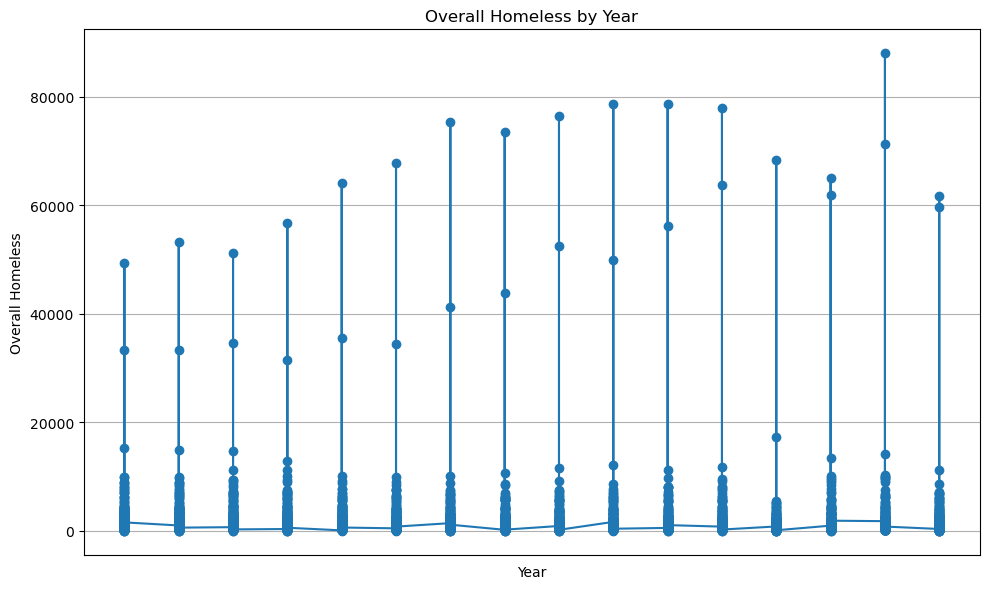

In [270]:

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(year_17_24['Year'], year_17_24['Overall Homeless'], marker='o', linestyle='-')
plt.title('Overall Homeless by Year')
plt.xlabel('Year')
plt.ylabel('Overall Homeless')
plt.grid(True)

plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

## XGBoost Model

In [80]:
general_homeless_cols['Count Types'].unique()

array(['Sheltered and Unsheltered Count', 'Sheltered-Only Count',
       'Sheltered and Partial Unsheltered Count', 'No 2010 PIT Count',
       'Sheltered-Only Count*'], dtype=object)

In [81]:
#drop CoC Number as it adds no significant vales to the dataset.
general_homeless_cols.drop(['CoC Number'], axis=1, inplace=True)

categorical_cols = ['State_Territory', 'CoC Name', 'Count Types']  # Adjust if different on your end

#One Hot Encode the categorical values.
homeless_data_encoded = pd.get_dummies(general_homeless_cols, columns=categorical_cols)


In [82]:
homeless_data_encoded.head()

,Year,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,Unsheltered Homeless,Unsheltered Chronically Homeless Individuals,Unsheltered Homeless Individuals,Unsheltered Homeless People in Families,...,CoC Name_Wyoming Statewide CoC,"CoC Name_Yonkers, Mount Vernon/Westchester County CoC",CoC Name_York City & County CoC,CoC Name_Youngstown/Mahoning County CoC,CoC Name_Yuba City & County/Sutter County CoC,Count Types_No 2010 PIT Count,Count Types_Sheltered and Partial Unsheltered Count,Count Types_Sheltered and Unsheltered Count,Count Types_Sheltered-Only Count,Count Types_Sheltered-Only Count*
0,2017,1128.0,848.0,280.0,87.0,114.0,155.0,44.0,155.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2017,717.0,506.0,211.0,78.0,102.0,139.0,55.0,139.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2017,1092.0,932.0,160.0,60.0,89.0,217.0,61.0,217.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,2017,606.0,426.0,180.0,57.0,65.0,265.0,56.0,247.0,18.0,...,0,0,0,0,0,0,0,1,0,0
4,2017,155.0,155.0,0.0,0.0,24.0,22.0,14.0,22.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [83]:
homeless_data_encoded.isnull().sum().any()

False

In [84]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#train test split
X = homeless_data_encoded.drop(['Overall Homeless', 'Year'], axis=1)
y = homeless_data_encoded['Overall Homeless']

# Train-test split: Here we use all data up to 2023 for training
train_X = X[homeless_data_encoded['Year'] <= 2022]
train_y = y[homeless_data_encoded['Year'] <= 2022]
test_X = X[homeless_data_encoded['Year'] == 2023]
test_y = y[homeless_data_encoded['Year'] == 2023]

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.4, learning_rate=0.1,
                         max_depth=5, alpha=10, n_estimators=100)

# Train the model
model.fit(train_X, train_y)


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
# Make predictions for 2023
y_pred_2023 = model.predict(test_X)

# Evaluate the predictions for 2023
rmse_2023 = mean_squared_error(test_y, y_pred_2023, squared=False)
print("RMSE for 2023 predictions: ", rmse_2023)

print(y_pred_2023)

RMSE for 2023 predictions:  780.3746847426502
[1.67547717e+03 9.04610229e+02 8.65809021e+02 6.61905212e+02
 2.02529068e+02 6.31748779e+02 3.55581116e+02 2.54943054e+02
 8.61736526e+01 2.86869812e+02 8.23048645e+02 4.43325867e+02
 8.06982605e+02 9.48684769e+01 5.16077881e+02 2.34198657e+03
 2.14368066e+03 9.03700293e+03 9.87758691e+03 7.32050049e+03
 9.52265039e+03 9.11401953e+03 2.10017969e+03 2.97320239e+03
 2.13690063e+03 1.09238672e+03 1.90179077e+03 5.76975830e+02
 2.01081311e+03 2.47769043e+03 1.94691003e+03 1.49116711e+03
 5.15374268e+03 7.05201721e+02 2.49576416e+03 5.34144287e+02
 1.10686829e+03 1.22661511e+03 7.51805237e+02 7.23764160e+02
 1.74575659e+03 3.81130615e+02 9.19022644e+02 4.95802368e+02
 6.98718628e+02 3.12113983e+02 4.47238342e+02 9.49044800e+01
 5.42114136e+02 6.08733086e+04 9.65036523e+03 5.90410156e+03
 2.03790051e+03 1.86839978e+03 3.51418945e+03 5.32824463e+02
 3.56248999e+03 5.03886084e+03 2.46753320e+03 1.76346039e+02
 1.50561792e+03 1.45417383e+03 2.169360

In [86]:
# We'll use 2023 features as a proxy for 2024
features_2024 = test_X.copy()

# Predict for 2024
y_pred_2024 = model.predict(features_2024)

# For simplicity, let's assume you're just printing them out or handling them in a basic way for now
print("Predicted homeless counts for 2024: ", y_pred_2024)


Predicted homeless counts for 2024:  [1.67547717e+03 9.04610229e+02 8.65809021e+02 6.61905212e+02
 2.02529068e+02 6.31748779e+02 3.55581116e+02 2.54943054e+02
 8.61736526e+01 2.86869812e+02 8.23048645e+02 4.43325867e+02
 8.06982605e+02 9.48684769e+01 5.16077881e+02 2.34198657e+03
 2.14368066e+03 9.03700293e+03 9.87758691e+03 7.32050049e+03
 9.52265039e+03 9.11401953e+03 2.10017969e+03 2.97320239e+03
 2.13690063e+03 1.09238672e+03 1.90179077e+03 5.76975830e+02
 2.01081311e+03 2.47769043e+03 1.94691003e+03 1.49116711e+03
 5.15374268e+03 7.05201721e+02 2.49576416e+03 5.34144287e+02
 1.10686829e+03 1.22661511e+03 7.51805237e+02 7.23764160e+02
 1.74575659e+03 3.81130615e+02 9.19022644e+02 4.95802368e+02
 6.98718628e+02 3.12113983e+02 4.47238342e+02 9.49044800e+01
 5.42114136e+02 6.08733086e+04 9.65036523e+03 5.90410156e+03
 2.03790051e+03 1.86839978e+03 3.51418945e+03 5.32824463e+02
 3.56248999e+03 5.03886084e+03 2.46753320e+03 1.76346039e+02
 1.50561792e+03 1.45417383e+03 2.16936084e+03 1.

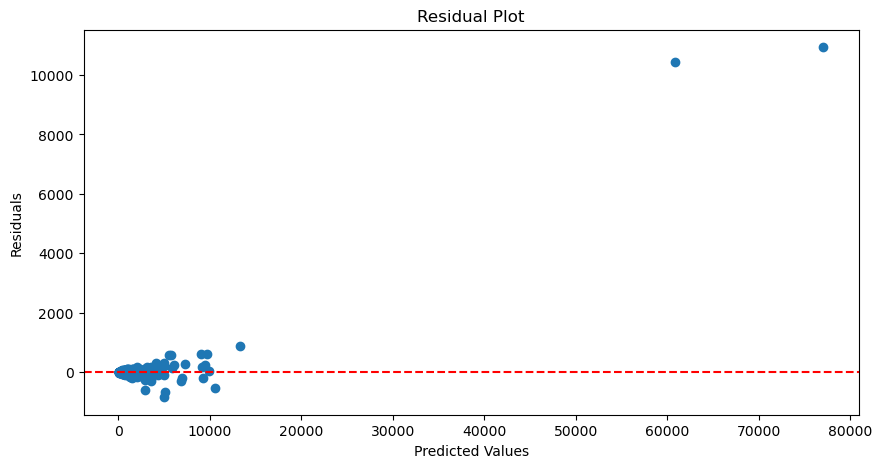

In [87]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = test_y - y_pred_2023

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2023, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
